# Anomaly Detection in Univariate Time-Series with Random Forest, in the context of WISDom project: Data Preprocessing

Feature Names
Index(['date', 'time', 'value', 'detection'], dtype='object')
Feature Names
Index(['date', 'time', 'value', 'detection'], dtype='object')
Feature Names
Index(['date'], dtype='object')
Data Dimension:
Number of Records: 480
Number of Features: 4
Data Dimension:
Number of Records: 96
Number of Features: 4
Data Dimension:
Number of Records: 767
Number of Features: 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       480 non-null    object 
 1   time       480 non-null    object 
 2   value      480 non-null    float64
 3   detection  480 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 15.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       96 non-null    

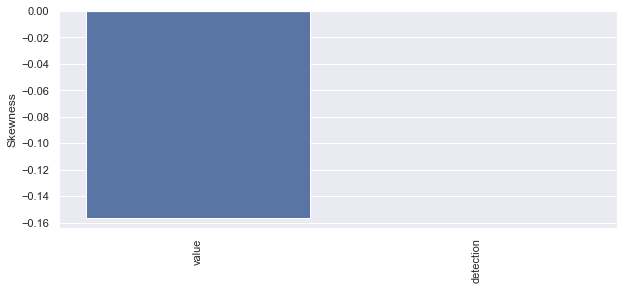

Skewness of the below features:
value       -0.104418
detection    2.038954
dtype: float64


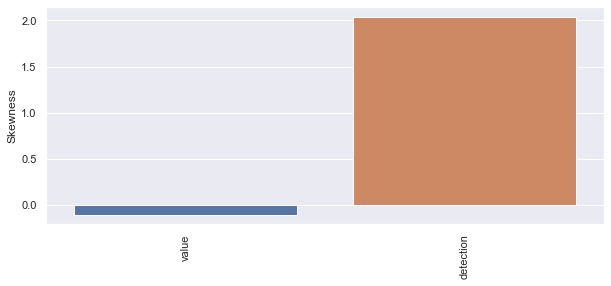

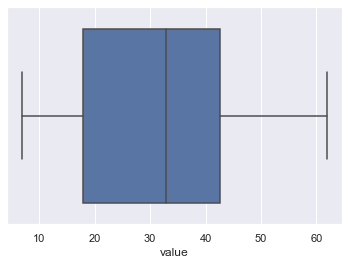

Interquartile range: 24.6293


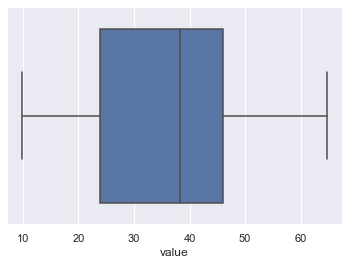

Interquartile range: 22.1598495375


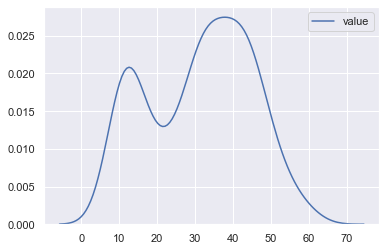

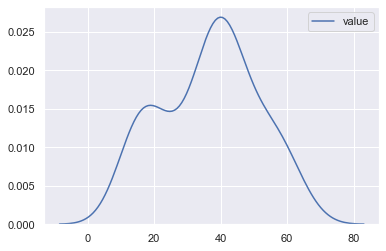

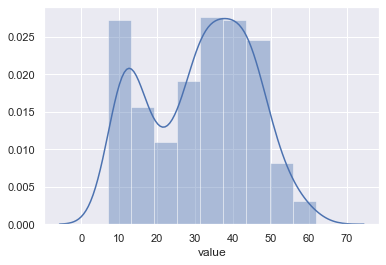

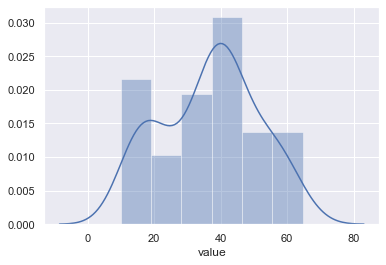

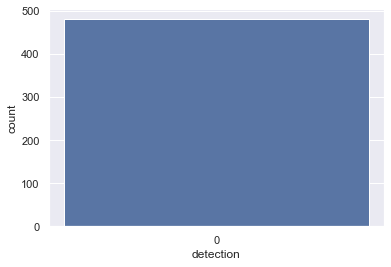

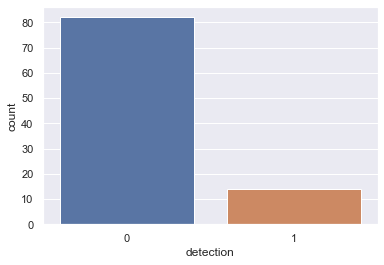

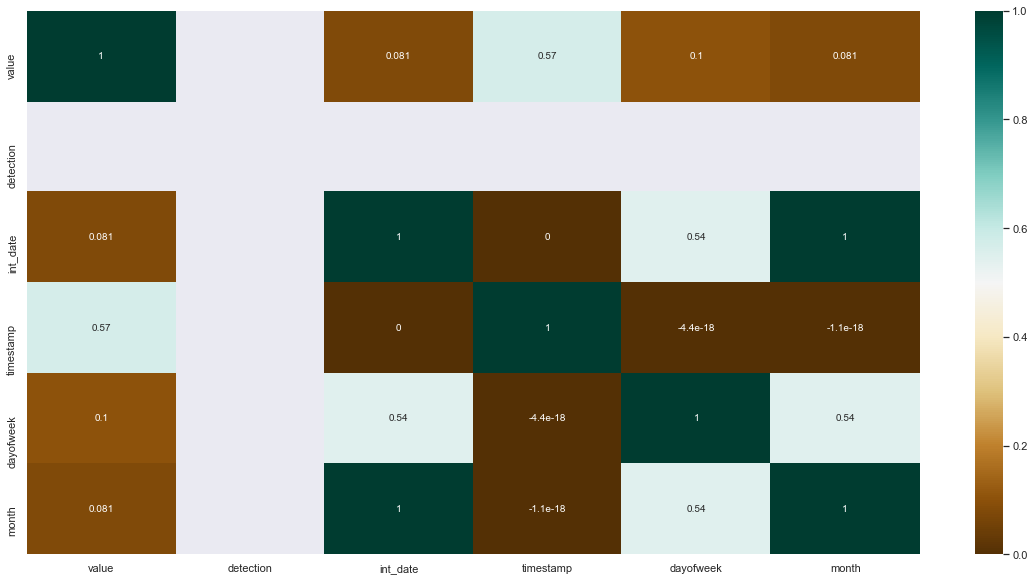

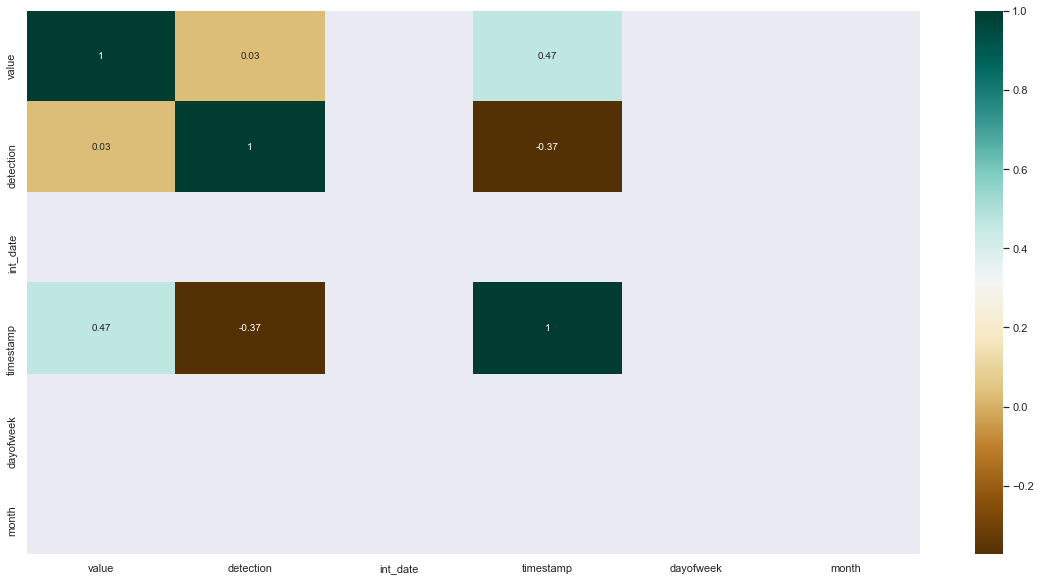

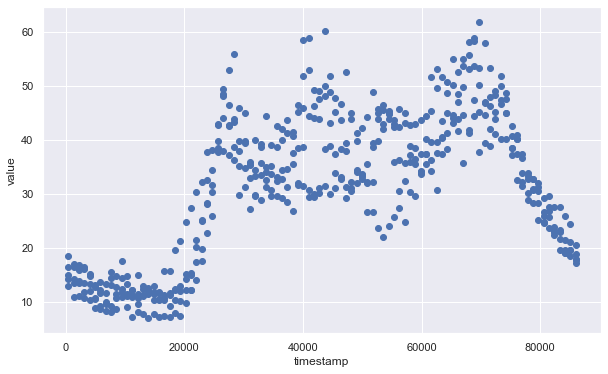

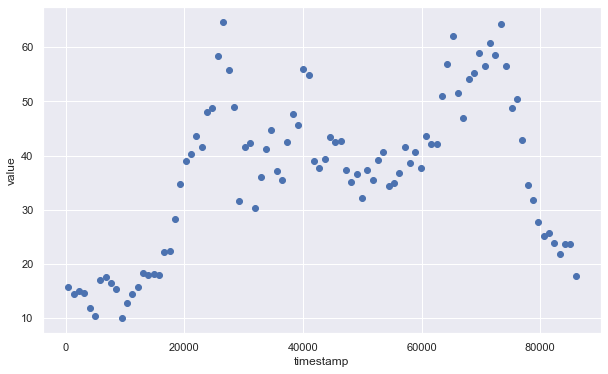

In [1]:
%run RandomForest_EDA.ipynb

### Import necessary libraries

In [ ]:
# For Data Preprocessing


## Feature Selection

Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.

Improves Accuracy: Less misleading data means modeling accuracy improves.

Reduces Training Time: fewer data points reduce algorithm complexity and algorithms train faster.

### Feature Selection methods:

Univariate Selection: Statistical tests can be used to select those features that have the strongest relationship with the output variable. The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

Feature Importance: Using the feature importance property of the model. Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Correlation Matrix with Heatmap: Correlation states how the features are related to each other or the target variable. 

#### Univariate Selection

The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the Mobile Price Range Prediction Dataset.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# data = pd.read_csv("D://Blogs//train.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range #apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

#### Feature Importance

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

In [ ]:
data = pd.read_csv("D://Blogs//train.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#### Correlation Matrix with Heatmap

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable).

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv("D://Blogs//train.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Have a look at the last row i.e price range, see how the price range is correlated with other features, ram is the highly correlated with price range followed by battery power, pixel height and width while m_dep, clock_speed and n_cores seems to be least correlated with price_range.